## DAT405 Introduction to Data Science and AI
# Assignment 4: Spam classification using Naïve Bayes

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 10
Maële Belmont | 10

ask:
- binarize value

## Setup
Python modules need to be loaded to solve the tasks.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from IPython.display import display_html 

## Task 1 - Preprocessing: 
#### a. Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher grade part), you will be asked to filter out the headers and footers. 

#### b. We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set.

In [16]:
#Function which updates figure numbers throughout the notebook 
#Run only if you want to reset the count
figureNmr = 0
def getFigureNmr():
    global figureNmr
    figureNmr = figureNmr + 1
    return figureNmr

In [17]:
#Method which saves files of a directory to a dataframe
def getFiles(folderpath):
    filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
    df = pd.DataFrame(filepaths)
    return df

#Assign dataframes to variables
e_ham_files = getFiles('easy_ham')
h_ham_files = getFiles('hard_ham') 
spam_ham_files = getFiles('spam')

#Method which extract all messages from a dataframe containing file-paths
def getFileContent(dataFrame,k):
    messages = []
    for i in range(len(dataFrame)):
        filename = dataFrame.iloc[i,0]
        with open(filename, encoding="Latin-1") as f:
            messages.append([f.read(),k]) #The "k" indicates whether it is spam=1 or ham=0
    data = pd.DataFrame(messages, columns=["Content","Type"])
    return data

In [18]:
#Assigning file contents from directory to respective data frames
easyHamContent = getFileContent(e_ham_files,0)
hardHamContent = getFileContent(h_ham_files,0)
spamContent = getFileContent(spam_ham_files,1)

# Split data frames into training set and test set (70-30)
easyHamTrain, easyHamTest = train_test_split(easyHamContent, test_size=0.3, random_state=0)
hardHamTrain, hardHamTest = train_test_split(hardHamContent, test_size=0.3, random_state=0)
spamTrain, spamTest = train_test_split(spamContent, test_size=0.3, random_state=0)

## Task 2 - Write a Python program that:
#### a. Uses four datasets (hamtrain, spamtrain, hamtest, and spamtest)

#### b. Using a Naïve Bayes classifier (e.g. Sklearn), classifies the test sets and reports the  percentage of ham and spam test sets that were classified correctly. You can use CountVectorizer to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn (Document is available here). Test two of these classifiers: 1. Multinomial Naive Bayes and 2. Bernoulli Naive Bayes that are well suited for this problem. For the case of Bernoulli Naive Bayes you should use the parameter binarize to make the features binary. Discuss the differences between these two classifiers. 

In [19]:
def bayesClassifier(hamTrain, spamTrain, hamTest, spamTest):  
    #Setting up parameters for classifer
    x_train = pd.concat([hamTrain["Content"], spamTrain["Content"]])
    y_train = pd.concat([hamTrain["Type"], spamTrain["Type"]])
    x_test = pd.concat([hamTest["Content"], spamTest["Content"]])
    y_test = pd.concat([hamTest["Type"], spamTest["Type"]])
    
    #Convert a collection of text documents to a matrix of token counts.
    #Needed in order to convert string to float for fitting 
    vectorizer = CountVectorizer()
    vectorizer.fit(x_train) #Learn a vocabulary dictionary
    trainVector = vectorizer.transform(x_train) #encode document as a vector
    testVector = vectorizer.transform(x_test) #encode document as a vector

    clf_MNB = MultinomialNB() # Multinomial Naive Bayes
    clf_BNB = BernoulliNB(fit_prior=False, binarize=1) # Bernouilli Naive Bayes

    #Model fitting 
    clf_MNB.fit(trainVector, y_train) 
    clf_BNB.fit(trainVector, y_train) 
    
    #Perform classification on array of test vectors
    y_pred_MNB = clf_MNB.predict(testVector) 
    y_pred_BNB = clf_BNB.predict(testVector)

    # Confusion matrix
    confusionMatrixMNB = metrics.confusion_matrix(y_test, y_pred_MNB)
    confusionMatrixBNB = metrics.confusion_matrix(y_test, y_pred_BNB)

    # Create figure with Seaborn
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=0.9, wspace=0.4, hspace=0.4)
    sns.heatmap(confusionMatrixMNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[0], cbar=False)
    axs[0].set_xlabel('Predicted') #modify x label
    axs[0].set_ylabel('Actual') #modify y label
    sns.heatmap(confusionMatrixBNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[1], cbar=False)
    axs[1].set_xlabel('Predicted') #modify x label
    axs[1].set_ylabel('Actual') #modify y label
    
    axs[0].set_title('Fig: ' + str(getFigureNmr()) + ' Accuracy Score Multinomial Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_MNB)*100), size = 12); #set title
    axs[1].set_title('Fig: ' + str(getFigureNmr()) + ' Accuracy Score Bernouilli Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_BNB)*100), size = 12); #set title

Observing the results in task 3.i and 3.ii, we can see that the Bernoulli naive bayes (BNB) classifier generates a lesser accuracy score, independently from the level of ham data, as compared to the multinomial naive bayes (MNB) classifier. Both classifiers did however score lesser when running the program on hard spam. There is a distinct difference between the two models. The MNB classifier counts the occurrence of a feature, such as counting how many times a certain word x apperars, while BNB works with binary/boolean features, related to Bernoulli trials where a trial has exactly two outcomes: success or failure. The "trial" would in this case investigate whether a word is present or not.

Considering the natures of these two models, it is self explanatory why the BNB classifier scores lower. With the BNB classifier, information can be lost. If a given word, example "Bitcoin" appears 10 times, the BNB classifier would only count this once as opposed to the MNB classifier,  diminishing its true impact on the classification.

Looking more closely at the confusion matrices of task 3.i, we can see that neither models have any significant difficulties classifying ham mails through a lot more spam mails that get classified as ham. In the case of hard ham, the amount of miss classified emails differs quite a lot as compared to those of the easy ham. Both models classified ham as spam though this misclassification occurs almost twice as much with the BNB classifier. As discussed earlier, the lower accuracy score of the BNB classifier is consistent, meaning that it scored lower than the MNB classifier. The individual differences between accuracy scores on easy vs. hard data does not however vary greatly.  

## Task 3 - Run your program on
#### i. Spam versus easy-ham

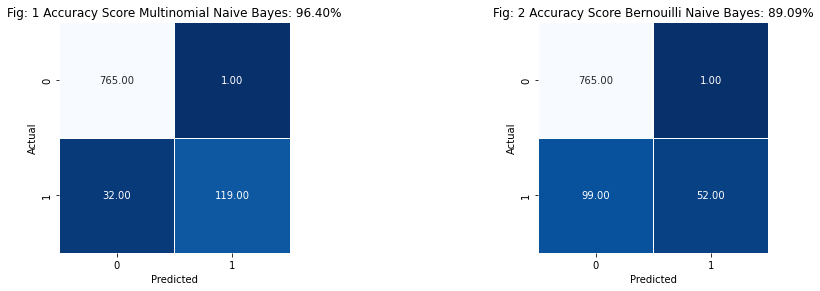

In [20]:
bayesClassifier(easyHamTrain, spamTrain, easyHamTest, spamTest)

#### ii. Spam versus hard-ham

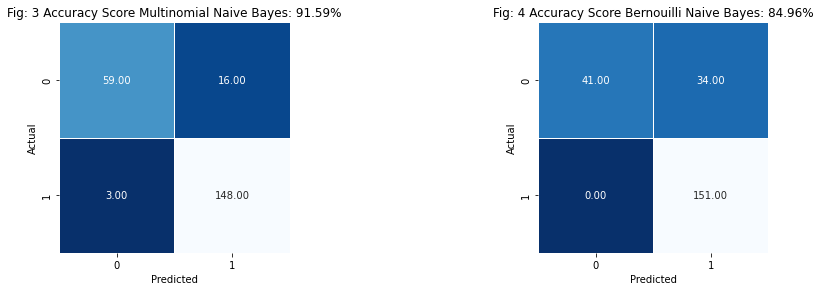

In [21]:
bayesClassifier(hardHamTrain, spamTrain, hardHamTest, spamTest)

## Task 4 - To avoid classification based on common and uninformative words it is common to filter these out. 
#### a. Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

As the classifiers train on words, it is important to only include words which provide a good base for the identification of the nature of the mail. I.e, being good indicators which add value to the classification process. For example, the most common word among the "easy ham" and "hard ham" dataset is "com". This word could however be seen as a "neutral" word. Intuitively, it is of common knowledge that the "com" belongs to a domain and does not necessarily classify an email as spam or ham. They are a part of standard email formats. Including such words in the training set interferes with the accuracy of the model. We can thus ignore these words. This goes for the common English words as "to", "the" and "with" as well, among many others. These words are called stop words, which are a language's most common words. The CountVectorizer has a parameter which can be set to filter out these stop words. This can be done by setting the parameter stop_words = "English''. In doing so, we can filter out all of these words which do not give any significant value to the classification process.   

In [22]:
def countWords(data, numberTOdisplay):
    countVect = CountVectorizer()
    countMatrix = countVect.fit_transform(data['Content'])
    countArray = countMatrix.toarray()
    words = pd.DataFrame(data=countArray,columns = countVect.get_feature_names())
    wordsSum = pd.DataFrame(words.sum(axis=0).sort_values(axis=0, ascending=False)).reset_index()
    wordsSum.columns = ['Word', 'Occurence']
    common = wordsSum.iloc[: numberTOdisplay, :]
    uncommon = wordsSum.tail(numberTOdisplay)
    df1_styler = common.style.set_table_attributes("style='display:inline'").set_caption('%.0f most common words in the dataset:' %(numberTOdisplay))
    df2_styler = uncommon.style.set_table_attributes("style='display:inline'").set_caption('%.0f of the most uncommon words in the dataset:' %(numberTOdisplay))

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [86]:
countWords(easyHamContent, 10)
print('Figure: ' + str(getFigureNmr()) + ' Tables over commom/uncommon words for EASY-HAM dataset')

,Word,Occurence
0,com,38878
1,to,24254
2,the,24092
3,2002,22279
4,from,21795
5,net,19312
6,with,16461
7,by,16373
8,for,16063
9,localhost,15846


Figure: 5 Tables over commom/uncommon words for EASY-HAM dataset


---

In [87]:
countWords(hardHamContent, 10)
print('Figure: ' + str(getFigureNmr()) + ' Tables over commom/uncommon words for HARD-HAM dataset')

,Word,Occurence
0,com,25080
1,http,23389
2,td,22786
3,width,17740
4,3d,14164
5,font,13015
6,www,13007
7,tr,11429
8,the,10705
9,br,10251


Figure: 6 Tables over commom/uncommon words for HARD-HAM dataset


---

In [88]:
countWords(spamContent, 10)
print('Figure: ' + str(getFigureNmr()) + ' Tables over commom/uncommon words for SPAM dataset')

,Word,Occurence
0,3d,11212
1,font,9235
2,to,6527
3,the,6027
4,com,5940
5,td,5479
6,from,4260
7,for,3964
8,and,3829
9,of,3699


Figure: 7 Tables over commom/uncommon words for SPAM dataset


---

#### b. Use the parameters in Sklearn’s CountVectorizer to filter out these words. Run the updated program on your data and record how the results differ from 3. You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you.

> Max_df stands for maximum document frequency. We can ignore words which occur frequently. These words could be like the word ‘the’ that occur in every document and does not provide and valuable information to our text classification or any other machine learning model and can be safely ignored. Max_df looks at how many documents contain the word and if it exceeds the max_df threshold then it is eliminated from the sparse matrix. This parameter can again 2 types of values, percentage and absolute. [Source: TowardsDataScience](https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)

> Furthermore, with the use of min_df, we can filter out words which are very uncommon, occuring maybe in only one, two or three emails. After having experimented with the two parameters, we found that a max_df of 0.9 and a min_df of 3 and 1 respectivly genereated greater accuracy scores.

>As seen in figure 8-11, some accuracy scores did improve, especially for the BNB classifier on easy-ham data. This has proved that filtering out and "cleaning" up the data strengthens the model's accuracy and thus the liability.

In [89]:
def bayesClassifierFiltered(hamTrain, spamTrain, hamTest, spamTest, max, min):
    
    #Setting up parameters for classifer
    x_train = pd.concat([hamTrain["Content"], spamTrain["Content"]])
    y_train = pd.concat([hamTrain["Type"], spamTrain["Type"]])
    x_test = pd.concat([hamTest["Content"], spamTest["Content"]])
    y_test = pd.concat([hamTest["Type"], spamTest["Type"]])
    
    #Convert a collection of text documents to a matrix of token counts.
    #Needed in order to convert string to float for fitting 
    vectorizer = CountVectorizer(stop_words="english", max_df = max, min_df = min)
    vectorizer.fit(x_train)
    trainVector = vectorizer.transform(x_train)
    testVector = vectorizer.transform(x_test)

    clf_MNB = MultinomialNB() # Multinomial Naive Bayes
    clf_BNB = BernoulliNB(fit_prior=False, binarize=1) # Bernouilli Naive Bayes

    #Fitting the model
    clf_MNB.fit(trainVector, y_train)
    clf_BNB.fit(trainVector, y_train)
    y_pred_MNB = clf_MNB.predict(testVector)
    y_pred_BNB = clf_BNB.predict(testVector)

    # Confusion matrix
    confusionMatrixMNB = metrics.confusion_matrix(y_test, y_pred_MNB)
    confusionMatrixBNB = metrics.confusion_matrix(y_test, y_pred_BNB)

    # Create figure with Seaborn
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=0.9, wspace=0.4, hspace=0.4)
    sns.heatmap(confusionMatrixMNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[0], cbar=False)
    axs[0].set_xlabel('Predicted') #modify x label
    axs[0].set_ylabel('Actual') #modify y label
    sns.heatmap(confusionMatrixBNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[1], cbar=False)
    axs[1].set_xlabel('Predicted') #modify x label
    axs[1].set_ylabel('Actual') #modify y label
    
    axs[0].set_title('Fig: ' + str(getFigureNmr()) + ' Accuracy Score Multinomial Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_MNB)*100), size = 12); #set title
    axs[1].set_title('Fig: ' + str(getFigureNmr()) + ' Accuracy Score Bernouilli Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_BNB)*100), size = 12); #set title


#### i. Spam versus Easy Ham

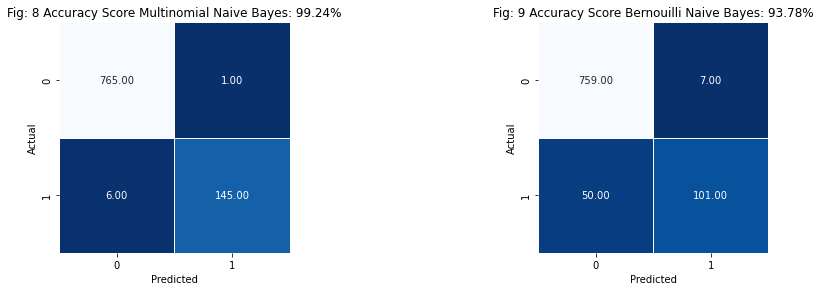

In [90]:
bayesClassifierFiltered(easyHamTrain, spamTrain, easyHamTest, spamTest, 0.9, 3)

#### ii. Spam versus hard-ham

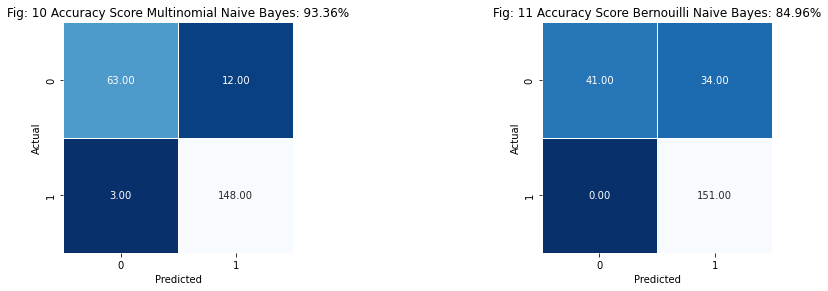

In [91]:
bayesClassifierFiltered(hardHamTrain, spamTrain, hardHamTest, spamTest, 0.9, 1)

## Task 5 - Filter out the headers and the footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
#### a. Does the result improve from 3 and 4?

In [92]:
def spamANDeasyHamFILTER(k, dfContent):
    header = [] # list conataining header
    message = [] # list conataining message+footer
    # Split the header and message+footer when there's a new paragraph ('\n\n')
    for i in range(len(dfContent)):
        if '\n\n' in dfContent['Content'][i]:
            h, m = dfContent['Content'][i].split('\n\n', 1) 
            header.append([h, k]) # k = type ham=0 or spam=1
            message.append([m, k])
        else:
            header.append(['', k]) 
            message.append([dfContent['Content'][i], k])
    headerDF = pd.DataFrame(header)
    messageDF = pd.DataFrame(message)
    messageDF.columns = ['Content', 'Type']
    
    mail = [] # list conataining message only
    footer = [] # list conataining footer
    # Split the message and footer when there's a many lines between paragraph ('\n\n\n\n\n')
    for i in range(len(messageDF)):
        if '\n\n\n\n\n' in messageDF['Content'][i]:
            m, f = messageDF['Content'][i].split('\n\n\n\n\n', 1) 
            mail.append([m, k]) # k = type ham=0 or spam=1
            footer.append([f, k])
        else:
            mail.append([messageDF['Content'][i], k])
            footer.append(['', k])
    mailTrain, mailTest = train_test_split(messageDF, test_size=0.3, random_state=0)
    return mailTrain, mailTest

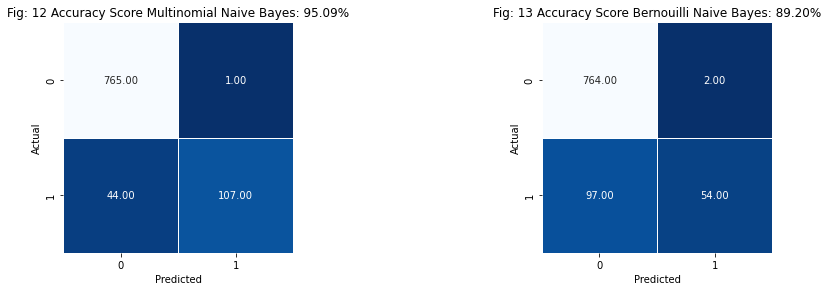

In [93]:
easyTrain, easyTest = spamANDeasyHamFILTER(0, easyHamContent)
spamTrainBis, spamTestBis = spamANDeasyHamFILTER(1, spamContent)
bayesClassifier(easyTrain, spamTrainBis, easyTest, spamTestBis)

#### b. The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies?

First of all, it is important to note that we use CountVectorizer() on training sets in order to set up the dictionary containing unique words which have been tokenized. In other words, our dictionary is only a subset. The x_train variable used in building up the dictionary is itself a subset as it contains split up content from ham data and spam data respectively. Ultimately, our dictionary is missing unique words which may only be present in the test data. 

Furthermore, as we train the model on x_train, which again consists of a subset of ham and spam training data, the content of these two data sets influence the results of the model. If the amount of spam emails in this set was very low, the dictionary would in return not contain a necessary amount of unique words in order to be used in the classification of spam emails later on. It is also important to choose the parameters max_df and min_df carefully as too much tuning might filter out words which has an important impact on the classification.

In order to avoid biased splits, one solution would be take an average of multiple splits. In other words, we could use k-fold cross-validation as we are dealing with a limited set of data.

#### c. What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages?

The number of ham emails which would be classified as spam would increase, i.e the number of false positives would increase. This is because, when training on a set which consists of mostly spam, the model would classify a greater amount of words of the ham emails as spam as that is what it has been trained on.